In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import RMSprop
from keras.datasets import mnist

Using Theano backend.


# ANN for MNIST digits classification

Downloading dataset to notebook directory. May take several minutes.

In [4]:
dataset = fetch_mldata('mnist-original', data_home='.')

Mixing dataset and splitting it to training and test subsets.

In [5]:
mixed_data = np.concatenate((dataset.target.reshape((70000,1)), dataset.data), axis=1)
np.random.shuffle(mixed_data)

Y = mixed_data[:,:1].astype('uint8')
X = mixed_data[:,1:]

In [6]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
X_test = X_test.astype('float32')
X_test = X_test/255

In [7]:
Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, 10)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, 10)

Displaying digits from train dataset with their labels (top right corner).

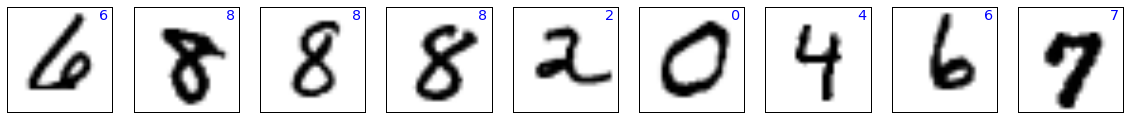

In [8]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,28,28))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='blue', size='x-large')

## Fully connected feedforward neural network

Prepering and traing model with two hidden layers with 512 relu units.

In [9]:
ff_model = Sequential()

input_units_num = 784
hidden_1_units_num = 529 # MUST have an integer sqare root in order to display weights as images
hidden_2_units_num = 529 # MUST have an integer sqare root in order to display weights as images
out_units_num = 10

ff_model.add(Dense(hidden_1_units_num, input_dim=input_units_num, activation='relu'))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(hidden_2_units_num, activation='relu'))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(out_units_num, activation='softmax'))

ff_model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
ff_model.fit(X_train, Y_train, validation_split=0.2, batch_size=128)

Train on 39200 samples, validate on 9800 samples
Epoch 1/10
39200/39200 [==============================] - 9s - loss: 0.2994 - acc: 0.9062 - val_loss: 0.1543 - val_acc: 0.9537
Epoch 2/10
39200/39200 [==============================] - 11s - loss: 0.1210 - acc: 0.9628 - val_loss: 0.1225 - val_acc: 0.9638
Epoch 3/10
39200/39200 [==============================] - 10s - loss: 0.0839 - acc: 0.9735 - val_loss: 0.1026 - val_acc: 0.9701
Epoch 4/10
39200/39200 [==============================] - 9s - loss: 0.0648 - acc: 0.9792 - val_loss: 0.1002 - val_acc: 0.9718
Epoch 5/10
39200/39200 [==============================] - 11s - loss: 0.0520 - acc: 0.9833 - val_loss: 0.1335 - val_acc: 0.9661
Epoch 6/10
39200/39200 [==============================] - 11s - loss: 0.0419 - acc: 0.9864 - val_loss: 0.1097 - val_acc: 0.9735
Epoch 7/10
39200/39200 [==============================] - 11s - loss: 0.0390 - acc: 0.9881 - val_loss: 0.1081 - val_acc: 0.9731
Epoch 8/10
39200/39200 [==============================] -

In [11]:
(loss, score) = ff_model.evaluate(X_test, Y_test)

20992/21000 [============================>.] - ETA: 0s

In [12]:
print("Model accuracy on test set is {}% ".format(score * 100))

Model accuracy on test set is 98.0047619047619% 


### Model misclassification examples

There is no interest in displaying an examples where model gave a correct answer. It's more interesting to display a wrong answers. Below you can see images where model made an error.

Firstly we need to get an image indexes which were misclassified by a model .

In [13]:
model_prediction = ff_model.predict_classes(X_test)
true_classes = np.argmax(Y_test, 1)
error_indexes = np.argwhere(model_prediction - true_classes)

20960/21000 [============================>.] - ETA: 0s

Displaying some error examples (top right corner. RED - model prediction, BLUE - right answer).

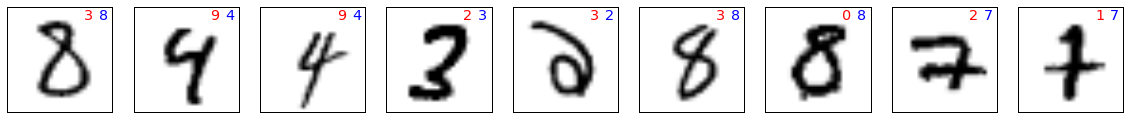

In [14]:
images_n_to_display = 9

image_indexes = error_indexes[:images_n_to_display].reshape(images_n_to_display)

sample_images = X_test[image_indexes].reshape((images_n_to_display,28,28))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
    axes[i].text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')

As you can see some digits are really looks like those which model predicts.

### Weights of the trained model

Now it's wery interesting to see what weights we get and display them as images.

In [15]:
weights = ff_model.get_weights()

In [16]:
weights_1l = weights[0].T # weights from input layer to first hidden layer
weights_2l = weights[2].T # weights from first hidden layer to second hidden layer
weights_3l = weights[4].T # weights from second hidden layer to output layer

Displaying weights from input layer to first hidden layer. There are 512 28x28 images.

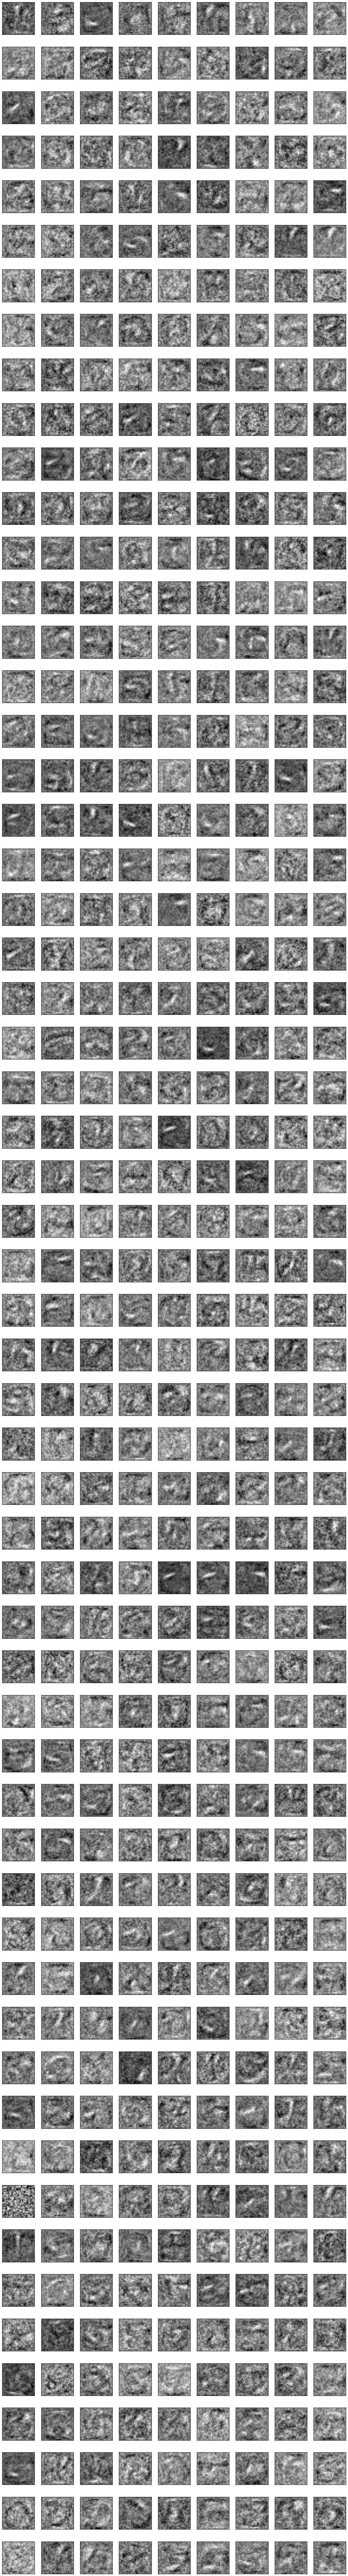

In [17]:
sample_images = weights_1l.reshape((hidden_1_units_num, 28 , 28))

cols_number = 9
rows_number = int(hidden_1_units_num/cols_number)

fig, axes = plt.subplots(ncols=cols_number, nrows=rows_number)
fig.set_figwidth(20)
fig.set_figheight(150)

for w, axis in zip(sample_images, axes.ravel()):
    axis.imshow(w, cmap=plt.cm.binary)
    axis.set_xticks(())
    axis.set_yticks(())

Can you see anything that looks like a part of digit?

Just for fun lets see on output layer weights.

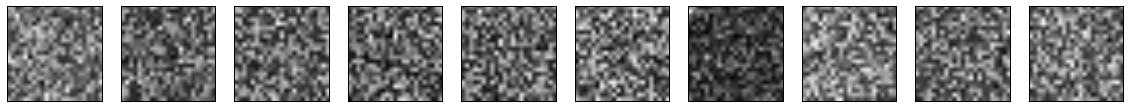

In [18]:
image_side = int(np.sqrt(hidden_2_units_num))
sample_images = weights_3l.reshape((out_units_num, image_side , image_side))

cols_number = 10

fig, axes = plt.subplots(ncols=cols_number)
fig.set_figwidth(20)
fig.set_figheight(150)

for w, axis in zip(sample_images, axes.ravel()):
    axis.imshow(w, cmap=plt.cm.binary)
    axis.set_xticks(())
    axis.set_yticks(())